In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


## Importing depecdencies

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split                # Split data into train and test data
from tensorflow.keras.models import Sequential                      # build sequential layer of neural network
from tensorflow.keras.layers import Dense, Embedding, LSTM          # 
from tensorflow.keras.preprocessing.text import Tokenizer           # to map words to intergers or vectors
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to ensure all data is in same shape
from tensorflow.keras.layers import Input

In [4]:
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [5]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

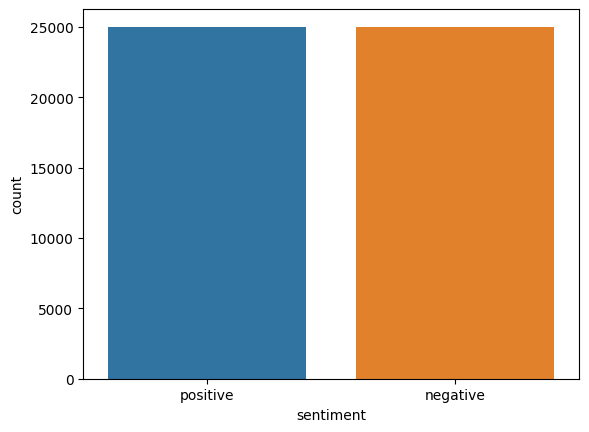

In [7]:
# Let's observe distribution of positive / negative sentiments in dataset

import seaborn as sns
sns.countplot(x='sentiment', data=data)

In [8]:
data.replace({'sentiment': {'positive':1,'negative':0}}, inplace=True)

/tmp/ipykernel_30/2544393355.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sentiment': {'positive':1,'negative':0}}, inplace=True)


## Split data into train and test data

In [9]:
# split data into training data and test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


## Data Processing

In [11]:
# Tokenizer Data
# tokenizer is used to  words into intergers, we take most common 5000 words and conveert words into numbers
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200) # pad_sequence makes sure input length remaing constant
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [12]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [13]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [14]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [15]:
print(Y_train.dtype)  # Should be int
print(Y_test.dtype)   # Should be int

int64
int64


In [16]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


# Building LSTM Model

In [17]:
# Define the model
model = Sequential()
model.add(Input(shape=(200,)))                                           # Specify input shape
model.add(Embedding(input_dim=5000, output_dim=128))                     # 1st layer, 5000 = tokenizer number of words , each word should be in 128 dimention vector space, 200 = max length pad sequence
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))                 # 2nd layer, 128 =  neurons, dropout = 20% data will be 0 to reduce overfitting, recc = do not overfit
model.add(Dense(1, activation="sigmoid"))                                # 3rd layer, dense = all neurons in previous layer connected to all neurons in dense layer, sigmoid= this is binary classification

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Training model

In [21]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 268s 213ms/step - accuracy: 0.7242 - loss: 0.5313 - val_accuracy: 0.8444 - val_loss: 0.3737
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 265s 212ms/step - accuracy: 0.8543 - loss: 0.3414 - val_accuracy: 0.8935 - val_loss: 0.2608
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 265s 212ms/step - accuracy: 0.9113 - loss: 0.2260 - val_accuracy: 0.8999 - val_loss: 0.2446
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 266s 213ms/step - accuracy: 0.9318 - loss: 0.1783 - val_accuracy: 0.8993 - val_loss: 0.2525
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 267s 213ms/step - accuracy: 0.9437 - loss: 0.1512 - val_accuracy: 0.8992 - val_loss: 0.2723


# Model Evalution

In [22]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.8993 - loss: 0.2720
Test Loss: 0.2722923457622528
Test Accuracy: 0.8992000222206116


## Building a Predictive System

In [23]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [24]:
# example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
The sentiment of the review is: positive


In [25]:
# example usage
new_review = "This movie was not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
The sentiment of the review is: negative


In [26]:
# example usage
new_review = "This movie was ok but not that good."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The sentiment of the review is: negative
